In [5]:
import pandas as pd
df=pd.read_csv("mtn_tweet_replies.csv")

C:\Users\LCT\AppData\Local\Temp\ipykernel_12432\3728053484.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["gray", "green", "red"])


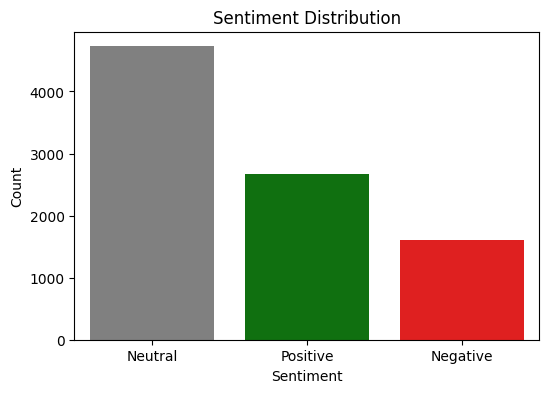

{'Topic 1': ['apologies',
  'delayed',
  'affected',
  'kindly',
  'ello',
  'issue',
  'response',
  'number',
  'dm',
  'thank'],
 'Topic 2': ['checks',
  'affected',
  'response',
  'phone',
  'dm',
  'ello',
  'activation',
  'thank',
  'number',
  'data'],
 'Topic 3': ['check',
  'mtn',
  'direct',
  'sim',
  'hi',
  'account',
  'https',
  'service',
  'message',
  'line'],
 'Topic 4': ['guys',
  'make',
  'dey',
  'mtn',
  'reply',
  'check',
  'una',
  'network',
  'dm',
  'mtnng'],
 'Topic 5': ['app',
  'refund',
  'did',
  'mtn',
  '15gb',
  'digital',
  'money',
  'bundle',
  'data',
  'mtnng']}

In [4]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].astype(str).apply(get_sentiment)

# Sentiment Distribution Plot
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["gray", "green", "red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Topic Modeling (LDA)
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(df["text"].astype(str))

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display Top Words for Each Topic
words = vectorizer.get_feature_names_out()
topics = {f"Topic {i+1}": [words[idx] for idx in lda.components_[i].argsort()[-10:]] for i in range(5)}

topics


In [10]:
df

,Unnamed: 0,type,id,url,twitterUrl,text,source,retweetCount,replyCount,likeCount,...,conversationId,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet
0,0,tweet,1885473934851617007,https://x.com/iamsidiking_/status/188547393485...,https://twitter.com/iamsidiking_/status/188547...,@MTNNG Dear @MTNNG why can I not purchase mtn ...,Twitter for iPhone,0,1,0,...,1885345166912798755,6.926643e+07,MTNNG,"{'type': 'user', 'userName': 'iamsidiking_', '...",{},NaN,{},"{'user_mentions': [{'id_str': '69266428', 'ind...",NaN,NaN
1,1,tweet,1885450000290754713,https://x.com/MTNNG/status/1885450000290754713,https://twitter.com/MTNNG/status/1885450000290...,@SonofGrace_2023 Apologies for the network iss...,Twitter for iPhone,0,0,0,...,1885345166912798755,1.398326e+18,SonofGrace_2023,"{'type': 'user', 'userName': 'MTNNG', 'url': '...",{},NaN,{},{'user_mentions': [{'id_str': '139832605355953...,NaN,NaN
2,2,tweet,1885441195758829663,https://x.com/RICHMANESUKWU/status/18854411957...,https://twitter.com/RICHMANESUKWU/status/18854...,@MTNNG @MTNNG you guys are really messing with...,Twitter for iPhone,0,1,0,...,1885345166912798755,6.926643e+07,MTNNG,"{'type': 'user', 'userName': 'RICHMANESUKWU', ...",{},NaN,{},"{'user_mentions': [{'id_str': '69266428', 'ind...",NaN,NaN
3,3,tweet,1885441147025195072,https://x.com/Amarantopashilo/status/188544114...,https://twitter.com/Amarantopashilo/status/188...,@SonofGrace_2023 @MTNNG Same in ebonyi.\nFull ...,Twitter for iPhone,0,0,0,...,1885345166912798755,1.398326e+18,SonofGrace_2023,"{'type': 'user', 'userName': 'Amarantopashilo'...",{},NaN,{},{'user_mentions': [{'id_str': '139832605355953...,NaN,NaN
4,4,tweet,1885440991248699681,https://x.com/Amarantopashilo/status/188544099...,https://twitter.com/Amarantopashilo/status/188...,@MVP_Guardian @MTNNG Same,Twitter for iPhone,0,0,0,...,1885345166912798755,1.361945e+18,MVP_Guardian,"{'type': 'user', 'userName': 'Amarantopashilo'...",{},NaN,{},{'user_mentions': [{'id_str': '136194491147033...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,244,tweet,1879869582502215820,https://x.com/StarCroft_Arch/status/1879869582...,https://twitter.com/StarCroft_Arch/status/1879...,@MTNNG Stop selling 5G router without power sw...,Twitter for iPhone,0,0,1,...,1879857330558517553,6.926643e+07,MTNNG,"{'type': 'user', 'userName': 'StarCroft_Arch',...",{},NaN,{},"{'user_mentions': [{'id_str': '69266428', 'ind...",NaN,NaN
9005,245,tweet,1879869020934938780,https://x.com/MTNNG/status/1879869020934938780,https://twitter.com/MTNNG/status/1879869020934...,"@ndukae069 Y'ello, thank you for reaching out ...",Twitter for iPhone,0,0,0,...,1879857330558517553,1.502025e+18,ndukae069,"{'type': 'user', 'userName': 'MTNNG', 'url': '...",{},NaN,{},{'user_mentions': [{'id_str': '150202536993063...,NaN,NaN
9006,246,tweet,1879868798100234375,https://x.com/ndukae069/status/187986879810023...,https://twitter.com/ndukae069/status/187986879...,@MTNNG I subscribed for digital bundle \nI hav...,Twitter for iPhone,0,1,1,...,1879857330558517553,6.926643e+07,MTNNG,"{'type': 'user', 'userName': 'ndukae069', 'url...",{},NaN,{},"{'user_mentions': [{'id_str': '69266428', 'ind...",NaN,NaN
9007,247,tweet,1879857373902438744,https://x.com/MTNNG/status/1879857373902438744,https://twitter.com/MTNNG/status/1879857373902...,https://t.co/tIPXla15ie,Twitter for iPhone,2,5,5,...,1879857330558517553,6.926643e+07,MTNNG,"{'type': 'user', 'userName': 'MTNNG', 'url': '...",{'media': [{'display_url': 'pic.twitter.com/tI...,NaN,{},{},NaN,NaN


In [14]:
# Specify the columns you want to extract
columns_to_extract = ['url', 'text','createdAt','author']

# Extract the specified columns
df = df[columns_to_extract]



In [16]:
import pandas as pd

# Load your Facebook dataset (update with your actual file path)

# Ensure text columns are strings and handle NaN values
df.fillna("", inplace=True)

# Define search terms
search_terms = ["MyMTN", "MyMTN app","app","application","mtn application","APP","App","mymtn","myMTN","Application","MTN application", "mtn app", "mymtn ng", "mtn nigeria app"]


# Filter comments that mention "MyMTN" or "MyMTN app"
comments_with_mymtn = df[df["text"].str.contains("|".join(search_terms), case=False, na=False)]

# Save results
comments_with_mymtn.to_csv("filtered_comments_mymtn.csv", index=False)

# Display summary
print(f" posts and {len(comments_with_mymtn)} comments mentioning 'MyMTN' or 'MyMTN app'.")


C:\Users\LCT\AppData\Local\Temp\ipykernel_1872\3511229901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("", inplace=True)


 posts and 1089 comments mentioning 'MyMTN' or 'MyMTN app'.


In [17]:
comments_with_mymtn

,url,text,createdAt,author
0,https://x.com/iamsidiking_/status/188547393485...,@MTNNG Dear @MTNNG why can I not purchase mtn ...,Fri Jan 31 23:43:11 +0000 2025,"{'type': 'user', 'userName': 'iamsidiking_', '..."
3,https://x.com/Amarantopashilo/status/188544114...,@SonofGrace_2023 @MTNNG Same in ebonyi.\nFull ...,Fri Jan 31 21:32:53 +0000 2025,"{'type': 'user', 'userName': 'Amarantopashilo'..."
7,https://x.com/bigvanilla03/status/188543278214...,@MTNNG I have been calling your customer care ...,Fri Jan 31 20:59:39 +0000 2025,"{'type': 'user', 'userName': 'bigvanilla03', '..."
8,https://x.com/bigvanilla03/status/188543228248...,@MTNNG What is wrong with you people?\nMyMTN a...,Fri Jan 31 20:57:40 +0000 2025,"{'type': 'user', 'userName': 'bigvanilla03', '..."
12,https://x.com/Haywhiled/status/188542140882762...,"@MTNNG Even if I miraculously update my BVN, b...",Fri Jan 31 20:14:27 +0000 2025,"{'type': 'user', 'userName': 'Haywhiled', 'url..."
...,...,...,...,...
8911,https://x.com/Dibiacharts/status/1874400902779...,@MTNNG Good morning and happy New year to you....,Wed Jan 01 10:22:54 +0000 2025,"{'type': 'user', 'userName': 'Dibiacharts', 'u..."
8936,https://x.com/MTNNG/status/1880214010009714889,@tobifunsho07 The trace ID 20 digit SMS sent f...,Fri Jan 17 11:22:07 +0000 2025,"{'type': 'user', 'userName': 'MTNNG', 'url': '..."
8953,https://x.com/MTNNG/status/1879874984740356208,@bigjoe_91 The line has been worked on. Please...,Thu Jan 16 12:54:57 +0000 2025,"{'type': 'user', 'userName': 'MTNNG', 'url': '..."
8984,https://x.com/MTNNG/status/1880214010009714889,@tobifunsho07 The trace ID 20 digit SMS sent f...,Fri Jan 17 11:22:07 +0000 2025,"{'type': 'user', 'userName': 'MTNNG', 'url': '..."


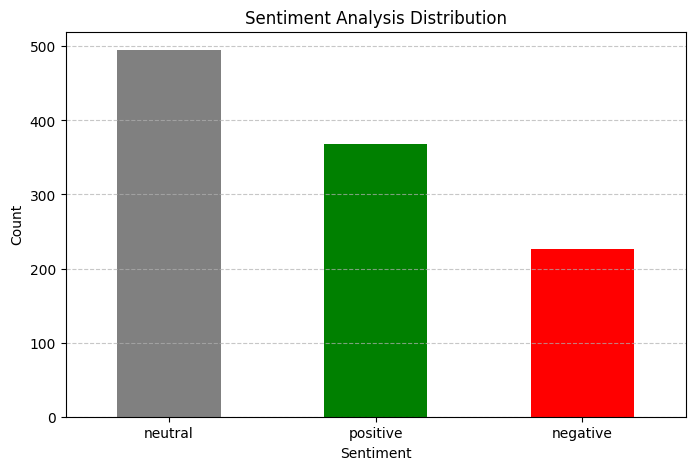

In [20]:
import matplotlib.pyplot as plt
df=pd.read_csv("filtered_comments_mymtn_sentiment.csv")
# Count the occurrences of each sentiment
sentiment_counts = df["sentiment analysis"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["gray","green", "red"])

# Labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


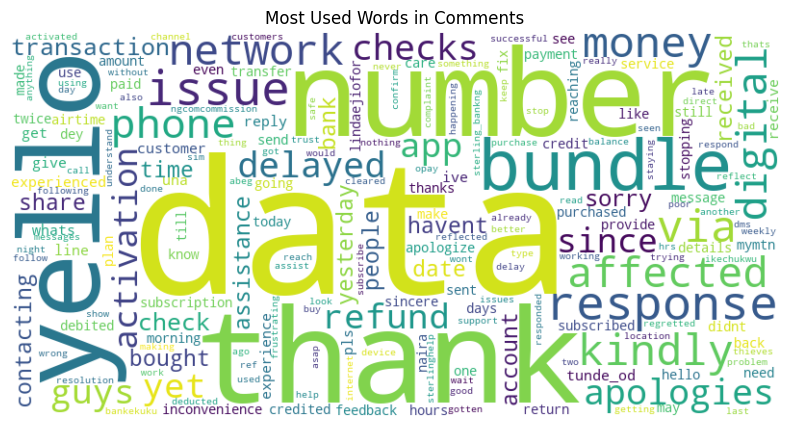

Top 20 Most Common Words in Comments:
data: 4324
thank: 1705
number: 1462
yello: 1256
bundle: 1251
response: 1123
issue: 1106
via: 933
money: 896
kindly: 877
digital: 840
affected: 837
network: 829
phone: 802
apologies: 724
delayed: 720
checks: 720
app: 697
yet: 681
refund: 666


In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer data if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# Uncomment and update this line to load your data
df = pd.read_csv('mtn_tweet_replies.csv')  # Replace 'your_file.csv' with the actual file path

# Combine all comment texts into a single string
all_comments = " ".join(df['text'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = text.lower()                  # Convert to lowercase
    return text.strip()

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['mtn', 'airtel', 'nigeria', 'other', 
                         'can', 'cant', 'do', 'dont', 'please','mtnng'])  # Add specific words to exclude

# Remove stopwords
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 20 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


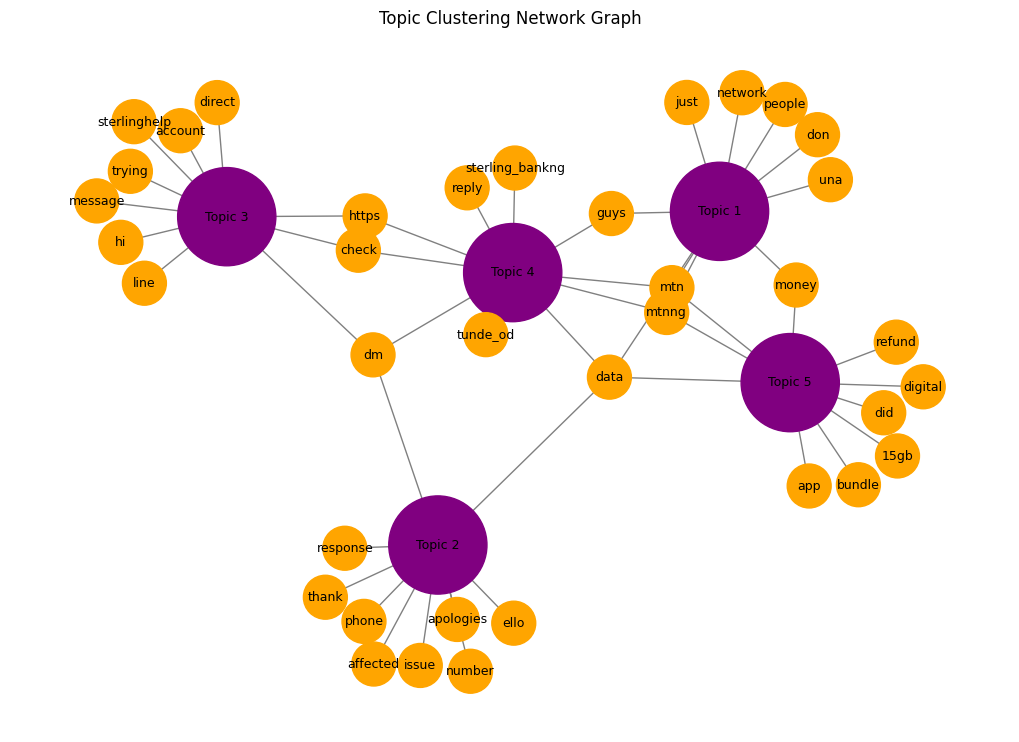

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Define topic clusters
topics = {
    'Topic 1': ['money', 'just', 'don', 'una', 'people', 'mtn', 'guys', 'network', 'data', 'mtnng'],
    'Topic 2': ['apologies', 'phone', 'affected', 'issue', 'data', 'response', 'ello', 'dm', 'number', 'thank'],
    'Topic 3': ['sterlinghelp', 'trying', 'line', 'direct', 'dm', 'https', 'account', 'check', 'message', 'hi'],
    'Topic 4': ['mtn', 'tunde_od', 'guys', 'sterling_bankng', 'https', 'data', 'reply', 'check', 'dm', 'mtnng'],
    'Topic 5': ['app', 'mtn', 'refund', 'did', 'money', '15gb', 'digital', 'bundle', 'data', 'mtnng']
}

# Create graph
G = nx.Graph()

# Add nodes and edges
for topic, words in topics.items():
    G.add_node(topic, size=5000, color='purple')  # Topic as a large red node
    for word in words:
        G.add_node(word, size=1000, color='orange')  # Words as blue nodes
        G.add_edge(topic, word)  # Connect topic to words

# Get node colors and sizes
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes]
node_sizes = [G.nodes[n].get('size', 500) for n in G.nodes]

# Draw network graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", font_size=9)
plt.title("Topic Clustering Network Graph")
plt.show()


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx

# Ensure stopwords are downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess text data
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['text'].dropna())

# Perform LDA for topic extraction
num_topics = 5  # Adjust number of topics if needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Get topic keywords
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics[f'Topic {topic_idx+1}'] = top_words

# Create Network Graph
G = nx.Graph()

# Add topics as nodes
for topic, keywords in topics.items():
    G.add_node(topic, size=500, color='purple')  # Larger size for topics

# Add words as nodes and connect to topics
for topic, keywords in topics.items():
    for word in keywords:
        G.add_node(word, size=300, color='orange')  # Smaller size for words
        G.add_edge(topic, word)  # Connect topic to word

# Draw the network graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color='gray', font_size=10)
plt.title("Topic Clustering Network Graph")
plt.show()
